# Abritrary Function Approximation

In [1]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt

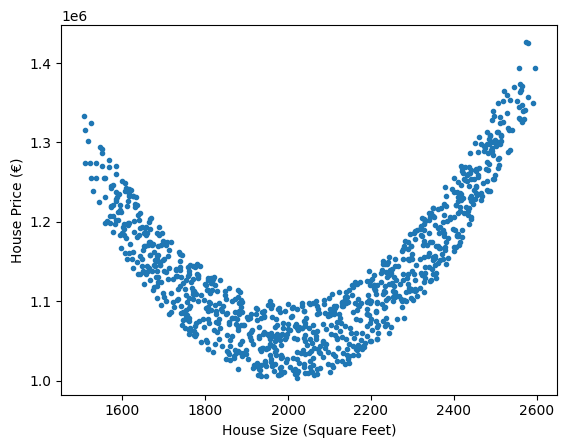

In [150]:
# Dataset: House sizes (in square feet) and their corresponding prices (in €)
house_sizes = (np.linspace(15, 25, 1000) + np.random.random((1000))) * 100
house_prices = (house_sizes ** 2) + (-4000 * house_sizes) + (5e6 + np.random.random((1000)) * 1e5)

plt.plot(house_sizes, house_prices, '.')
plt.xlabel('House Size (Square Feet)'); plt.ylabel('House Price (€)')
plt.show()

In [151]:
# Hypothesis function: h(x) = m * x + c
def hypothesis(a, b, c, x):
    return  (a * (x ** 2)) + (b * x) + c

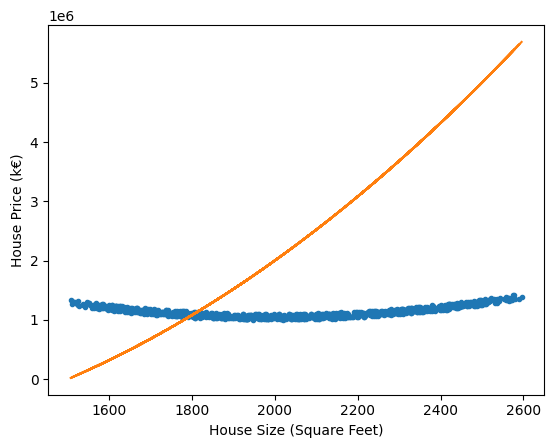

In [152]:
preds = hypothesis(2, -3000, 0, house_sizes) # Random values for m and c
plt.plot(house_sizes, house_prices, '.')
plt.plot(house_sizes, preds, '-') 
plt.xlabel('House Size (Square Feet)')
plt.ylabel('House Price (k€)')
plt.show()

In [146]:
# Cost function: Mean Squared Error
def cost_function(a, b, c, x, y):
    M = len(y)
    return (1/(2*M)) * np.sum((y - hypothesis(a, b, c, x))**2)

In [147]:

# Gradient Descent Algorithm
def gradient_descent(a, b, c, x, y, learning_rate, iterations):
    M = len(y)
    cost_history = []

    for _ in range(iterations):
        # Compute the gradients
        da = (1/M) * np.sum((y - hypothesis(a, b, c, x)) * -1 * (x ** 2))
        db = (1/M) * np.sum((y - hypothesis(a, b, c, x)) * -1 * x)
        dc = (1/M) * np.sum((y - hypothesis(a, b, c, x)) * -1)

        # Update parameters
        a = a - learning_rate * da
        b = b - learning_rate * db
        c = c - learning_rate * dc

        # Save the cost for each iteration
        cost_history.append(cost_function(a, b, c, x, y))

    return a, b, c, cost_history

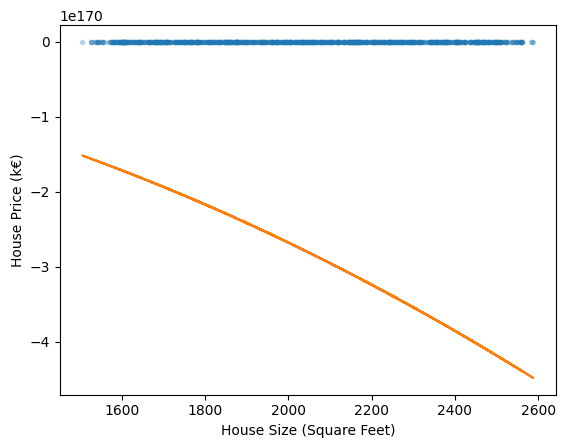

<Figure size 640x480 with 0 Axes>

Iteration number:  32


KeyboardInterrupt: 

<Figure size 640x480 with 0 Axes>

In [149]:
import time
import matplotlib.pyplot as plt
from IPython.display import clear_output, display

cost_history = []
iterations = 100

def train():
    # Training the model
    a, b, c = 1, -3000, 5e6  # Initial values of parameters
    learning_rate = 1e-8  # You may need to adjust it
    
    for i in range(iterations):
        print("Iteration number: ", i+1)
        a, b, c, ch = gradient_descent(a, b, c, house_sizes, house_prices, learning_rate, 1)
        time.sleep(0.1)  # Sleep for visualization
        clear_output(wait=True)

        preds = hypothesis(a, b, c, house_sizes)
        plt.plot(house_sizes, house_prices, '.', alpha=0.25)
        plt.plot(house_sizes, preds, '-')
        plt.xlabel('House Size (Square Feet)'); plt.ylabel('House Price (€)')
        plt.show()
        
        display(plt.gcf())
        cost_history.append(ch[0])

    return a, b, c, cost_history

A, B, C, cost_history = train()

print(f'Final values: {A, B, C}')
print(f'Cost history: {cost_history[-15:]}')  # Print the last 5 costs to check convergence

## Enter Neural Nets

In [259]:
import torch
import torch.optim as optim

In [354]:
dataset = torch.tensor(np.array([house_sizes, house_prices]), dtype=torch.double)
mean, std = dataset.mean(dim=0), dataset.std(dim=0)
dataset = (dataset - mean) / std

trainloader = torch.utils.data.DataLoader(dataset.T, batch_size=8, shuffle=True)
dataset = (dataset * std) + mean

In [372]:
class AFA(torch.nn.Module):
    def __init__(self):
        super(AFA, self).__init__()
        self.fc1 = torch.nn.Linear(1, 10)
        self.fc2 = torch.nn.Linear(10, 100)
        self.fc3 = torch.nn.Linear(100, 10)
        self.fc4 = torch.nn.Linear(10, 1)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = torch.relu(self.fc3(x))
        x = self.fc4(x)
        return x

net = AFA()
net = net.to(device=torch.device("cpu"), dtype=torch.double)

In [373]:
optimizer = optim.SGD(net.parameters(), lr=0.00001)

for epoch in range(100):  # loop over the dataset multiple times
    
    for i, data in enumerate(trainloader):
        inputs, labels = data.T.unsqueeze(dim=2)
        
        optimizer.zero_grad()
        outputs = net(inputs)
        
        loss = torch.nn.functional.mse_loss(outputs, labels)
        
        # Backpropagate: calculate gradients
        loss.backward()
        
        # Optimize: adjust weights acc to gradient
        optimizer.step()
    
    print(f'[Epoch {epoch + 1}] loss: {loss.detach().item()}')

print('Finished Training')

[Epoch 1] loss: 0.2517701555864278
[Epoch 2] loss: 0.24994327155806648
[Epoch 3] loss: 0.2481296215987453
[Epoch 4] loss: 0.24632909463079272
[Epoch 5] loss: 0.24454158087882205
[Epoch 6] loss: 0.24276697184881268
[Epoch 7] loss: 0.24100516030759314
[Epoch 8] loss: 0.23925604026272115
[Epoch 9] loss: 0.23751950694274906
[Epoch 10] loss: 0.23579545677786728
[Epoch 11] loss: 0.23408378738091723
[Epoch 12] loss: 0.2323843975287649
[Epoch 13] loss: 0.2306971871440294
[Epoch 14] loss: 0.22902205727715536
[Epoch 15] loss: 0.22735891008882442
[Epoch 16] loss: 0.2257076488326985
[Epoch 17] loss: 0.22406817783848582
[Epoch 18] loss: 0.222440402495324
[Epoch 19] loss: 0.22082422923547307
[Epoch 20] loss: 0.21921956551831218
[Epoch 21] loss: 0.21762631981463343
[Epoch 22] loss: 0.21604440159122634
[Epoch 23] loss: 0.21447372129574585
[Epoch 24] loss: 0.21291419034186093
[Epoch 25] loss: 0.21136572109467322
[Epoch 26] loss: 0.20982822685640495
[Epoch 27] loss: 0.20830162185234727
[Epoch 28] loss: 

In [374]:
# Inferece
with torch.no_grad():
    predicted_price = net(dataset[0].unsqueeze(dim=1)).squeeze(dim=1)

predicted_price = (predicted_price * std) + mean


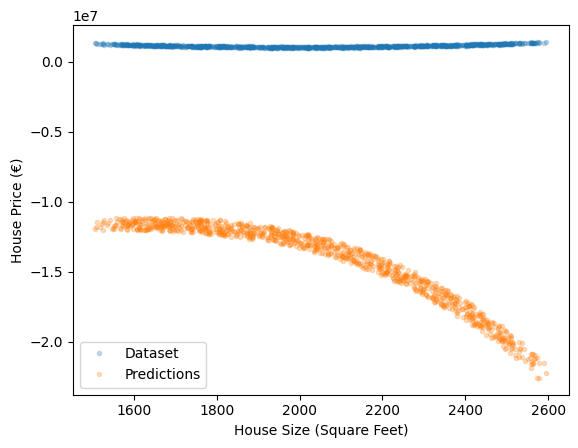

In [376]:
# Plot the final model
plt.plot(house_sizes, house_prices, '.', alpha=0.25, label="Dataset")
plt.plot(house_sizes, predicted_price, '.', alpha=0.25, label="Predictions")
plt.xlabel('House Size (Square Feet)'); plt.ylabel('House Price (€)')
plt.legend()
plt.show()